In [40]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
# importing libraries
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import keras
from keras.initializers import glorot_uniform
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout, GlobalAveragePooling2D ,AveragePooling2D

from tensorflow.keras.activations import relu, softmax
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras import backend as K
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical
from keras import regularizers
from keras.regularizers import l2, l1
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img, save_img
from keras.models import load_model
import matplotlib.pyplot as plt


plt.style.use('fivethirtyeight')

In [42]:
# image parameters:

WIDTH = 128
HEIGHT = 128
CHANNELS = 3
CLASSES = 2

In [43]:
pred_path = '../../data/aug_red_eye/prediction_images'
number_of_images = '../../data/aug_red_eye/prediction_images/prediction'
img_list_len = len(os.listdir(number_of_images))
batch_size = int(img_list_len)
pred_datagen = ImageDataGenerator(
                                rescale=1./255) #preprocessing_function= preprocess_input,

pred_generator = pred_datagen.flow_from_directory(
    directory= pred_path,
    target_size=(WIDTH, HEIGHT),
    color_mode="rgb",
    batch_size=batch_size,
    class_mode=None,
    shuffle=False,
    seed=42
)

Found 9 images belonging to 1 classes.


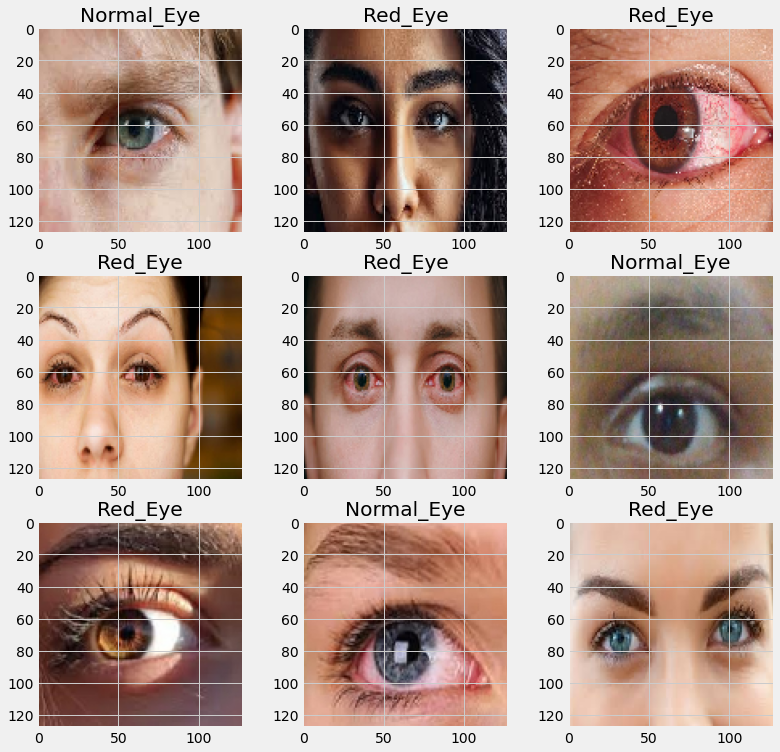

In [44]:
plt.style.use('fivethirtyeight')
ncols = 3
nrows = 3

fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)


x_pred = pred_generator.__next__()
path_model = '../../custom_model/Model_Outputs/2022_08_23/exp_imb_data_200ep/model/model.h5'
model = load_model(path_model, compile=False)
# checking/ verifying if the image and masks are coorelated
for i in range(0,batch_size):
    predict=model.predict(pred_generator, verbose = 0)
    y_classes = predict.argmax(axis=-1)
    
    if y_classes[i] == 0:
        label = 'Normal_Eye'
    else:
        label = 'Red_Eye'
    for j in range(0,batch_size):
    
        ax = fig.add_subplot(ncols,nrows,i+1)
        ax.set_title(label)
        image = x_pred[i]
        #rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        plt.subplot(ncols,nrows,i+1)
    plt.imshow(image)
plt.show()